In [2]:
#패키지
import SimpleITK as sitk
import pydicom as dcm
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
import pandas as pd


In [3]:
PATH_DATASET_CSV = '../Dataset/Dataset_with_path.csv'

df_dataset = pd.read_csv(PATH_DATASET_CSV)

In [4]:
df_dataset = df_dataset[['source','path','filename','group_maxinc','age']].dropna()

In [6]:
def read_dicom_file(source,filepath):
    """Read and load volume"""
    sitk_t1 = sitk.ReadImage(filepath)
    print('ORG_Direction',sitk_t1.GetDirection())
    #print('ORG_Origin',sitk_t1.GetOrigin())
    sitk_t1.SetDirection([1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0])
    #print('TOBE_Origin',sitk_t1.GetOrigin())
    print('TOBE_Direction',sitk_t1.GetDirection())

    image = sitk.GetArrayFromImage(sitk_t1)
    #oasis
    if source=='OASIS-3':
        image = image.transpose(1,2,0)
        image = ndimage.rotate(image,180,reshape=False)
        image = image[:,:,::-1]
    else:
        image = image.transpose(2,0,1)
    return image


def sample_stack(stack,rows=6,cols=6,start_with=10,show_every=5,subtitle='title'):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    plt.suptitle(subtitle)
    for i in range(rows*cols):
        ind = start_with = i*show_every
        ax[int(i / rows),int(i % rows)].set_title('slice %d'%ind)
        ax[int(i / rows),int(i % rows)].imshow(stack[:,:,ind],cmap='gray')
        ax[int(i / rows),int(i % rows)].axis('off')
    plt.show()

def preprocessing(image):
    return image

def process_scan(source, filepath):
    
    image = read_dicom_file(source, filepath)
    
    image = preprocessing(image)

    return image


In [8]:
img_num=800
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)


RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "../Dataset/OASIS_BET/sub-OAS30760_sess-d3837_run-01_T1w.nii" does not exist.

ORG_Direction (-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0)
TOBE_Direction (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(240, 160, 256)


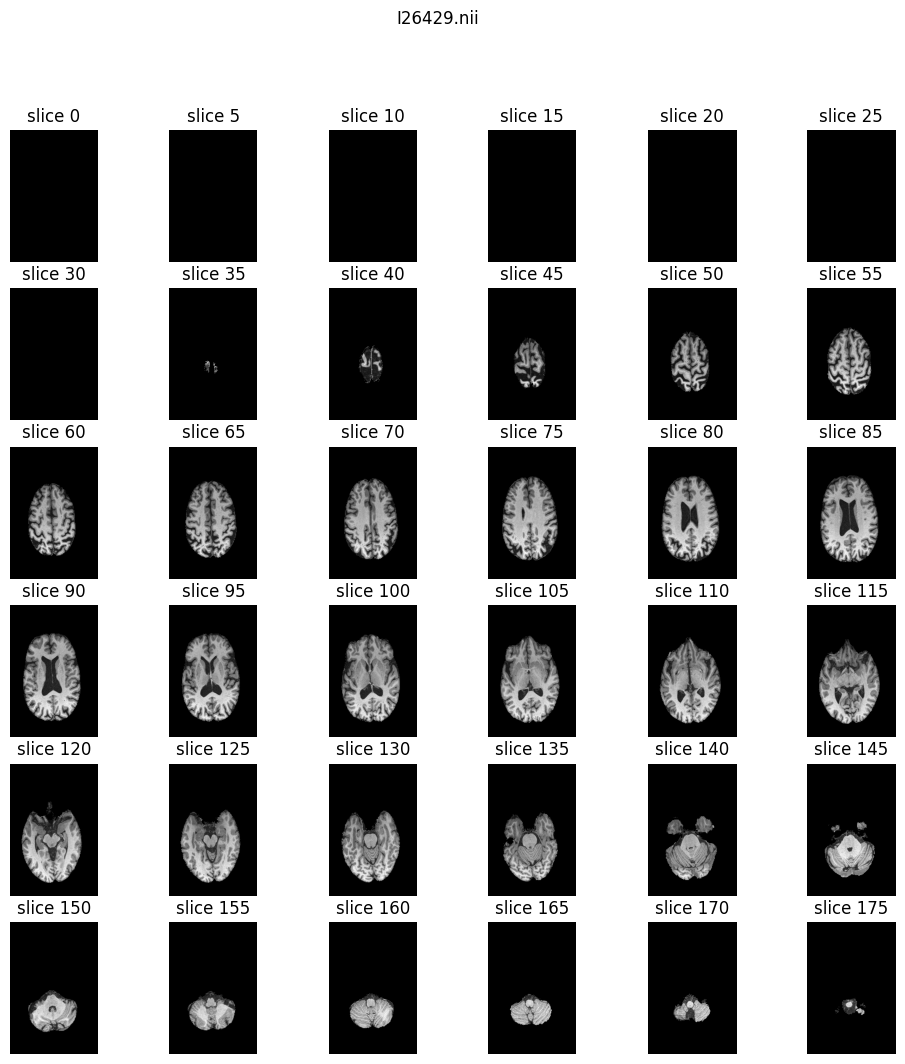

In [134]:
img_num=1280
filename=df_dataset['filename'][img_num]
img = read_dicom_file(df_dataset['source'][img_num],df_dataset['path'][img_num])
print(img.shape)
sample_stack(img,subtitle=filename)
